<a href="https://colab.research.google.com/github/s-zhang-cs/PyTorch-Exercises/blob/main/ANN_classification_codealong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

From Pytorch for deep learning with Python Bootcamp by Jose Portilla



In [1]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Data/NYCTaxiFares.csv')
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [3]:
def haversine_distance(df, lat1, long1, lat2, long2):
    """
    Calculates the haversine distance between 2 sets of GPS coordinates in df
    """
    r = 6371  # average radius of Earth in kilometers
       
    phi1 = np.radians(df[lat1])
    phi2 = np.radians(df[lat2])
    
    delta_phi = np.radians(df[lat2]-df[lat1])
    delta_lambda = np.radians(df[long2]-df[long1])
     
    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = (r * c) # in kilometers

    return d

In [4]:
df['dist_km'] = haversine_distance(df, 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


In [5]:
df['EDTdate'] = pd.to_datetime(df['pickup_datetime'].str[:19]) - pd.Timedelta(hours=4)
df['Hour'] = df['EDTdate'].dt.hour
df['AMorPM'] = np.where(df['Hour']<12, 'am', 'pm')
df['Weekday'] = df['EDTdate'].dt.strftime("%a")
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTdate,Hour,AMorPM,Weekday
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56,4,am,Mon
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53,11,am,Sat
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26,7,am,Sat
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03,17,pm,Sun
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01,22,pm,Fri


In [6]:
print(df.columns)
print(df.dtypes)

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'dist_km', 'EDTdate', 'Hour', 'AMorPM', 'Weekday'],
      dtype='object')
pickup_datetime              object
fare_amount                 float64
fare_class                    int64
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
dist_km                     float64
EDTdate              datetime64[ns]
Hour                          int64
AMorPM                       object
Weekday                      object
dtype: object


In [7]:
cat_cols = ['Hour', 'AMorPM', 'Weekday']
cont_cols = ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'passenger_count', 'dist_km']
y_col = ['fare_class']

In [8]:
# category values
for cat in cat_cols:
  df[cat] = df[cat].astype('category')

df.dtypes

pickup_datetime              object
fare_amount                 float64
fare_class                    int64
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
dist_km                     float64
EDTdate              datetime64[ns]
Hour                       category
AMorPM                     category
Weekday                    category
dtype: object

In [9]:
df['Hour'].cat.categories

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23],
           dtype='int64')

In [10]:
df['Hour'].cat.codes

0          4
1         11
2          7
3         17
4         22
          ..
119995    10
119996     6
119997    14
119998     4
119999    12
Length: 120000, dtype: int8

In [11]:
hr = df['Hour'].cat.codes.values
ampm = df['AMorPM'].cat.codes.values
wkdy = df['Weekday'].cat.codes.values

cats = np.stack([hr, ampm, wkdy], 1)
cats = torch.tensor(cats, dtype=torch.int64)
cats[:5]

tensor([[ 4,  0,  1],
        [11,  0,  2],
        [ 7,  0,  2],
        [17,  1,  3],
        [22,  1,  0]])

In [12]:
# continuous values
conts = np.stack([df[col].values for col in cont_cols], 1)
conts = torch.tensor(conts, dtype=torch.float)
conts[:5]

tensor([[ 40.7305, -73.9924,  40.7447, -73.9755,   1.0000,   2.1263],
        [ 40.7406, -73.9901,  40.7441, -73.9742,   1.0000,   1.3923],
        [ 40.7511, -73.9941,  40.7662, -73.9601,   2.0000,   3.3268],
        [ 40.7564, -73.9905,  40.7482, -73.9712,   1.0000,   1.8641],
        [ 40.7342, -73.9910,  40.7431, -73.9060,   1.0000,   7.2313]])

In [13]:
y = torch.tensor(df[y_col].values)

In [14]:
y = y.flatten()

In [15]:
print(cats.shape)
print(conts.shape)
print(y.shape)

torch.Size([120000, 3])
torch.Size([120000, 6])
torch.Size([120000])


In [16]:
# setting embedding size
cat_szs = [len(df[col].cat.categories) for col in cat_cols]
emb_szs = [(size, min(50, (size + 1) // 2)) for size in cat_szs]
print(cat_szs)
print(emb_szs)

[24, 2, 7]
[(24, 12), (2, 1), (7, 4)]


In [17]:
# define tabular model
class TabularModel(nn.Module):
  """ A generic tabular model which can deal with both categorical and generic data.

  Args:
    emb_szs (list[tuple]): embedding sizes for categorical data
    n_cont (int): number of continuous data
    out_sz (int): size of output layer
    layers (list[int]): layer size specification"""

  def __init__(self, emb_szs, n_cont, out_sz, layers, p=0.5):
    super().__init__()
    self.embeds = nn.ModuleList([nn.Embedding(ni,nf) for ni,nf in emb_szs])
    self.emb_drop = nn.Dropout(p)
    self.bn_cont = nn.BatchNorm1d(n_cont)

    layerlist = []
    n_emb = sum((nf for ni,nf in emb_szs))
    n_in = n_emb + n_cont

    for i in layers:
      layerlist.append(nn.Linear(n_in, i))
      layerlist.append(nn.ReLU(inplace=True))
      layerlist.append(nn.BatchNorm1d(i))
      layerlist.append(nn.Dropout(p))
      n_in = i
    layerlist.append(nn.Linear(layers[-1], out_sz))

    self.layers = nn.Sequential(*layerlist)

  def forward(self, x_cat, x_cont):
    embeddings = []
    for i,e in enumerate(self.embeds):
      embeddings.append(e(x_cat[:, i]))
    x = torch.cat(embeddings, 1)
    x = self.emb_drop(x)

    x_cont = self.bn_cont(x_cont)
    x = torch.cat([x, x_cont], 1)
    x = self.layers(x)
    return x

In [18]:
model = TabularModel(emb_szs, conts.shape[1], 2, [200, 100], p=0.4) # instead of 'out_sz == 1' for regression, 'out_sz == 2' for binary classification

In [19]:
model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(24, 12)
    (1): Embedding(2, 1)
    (2): Embedding(7, 4)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=23, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=2, bias=True)
  )
)

In [20]:
criterion = nn.CrossEntropyLoss() # instead of 'MSE' for regression, 'CrossEntropy' for binary classification
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3) 

In [21]:
batch_size = 60000
test_size = 12000

cat_train = cats[:batch_size - test_size]
cat_test = cats[batch_size - test_size:batch_size]
con_train = conts[:batch_size - test_size]
con_test = conts[batch_size - test_size:batch_size]

y_train = y[:batch_size-test_size]
y_test = y[batch_size-test_size:batch_size]

In [22]:
print(len(cat_train))
print(cat_train.dtype)
print(len(cat_test))
print(cat_test.dtype)
print(len(con_train))
print(con_train.dtype)
print(len(con_test))
print(con_test.dtype)
print(len(y_train))
print(y_train.dtype)
print(len(y_test))
print(y_test.dtype)

48000
torch.int64
12000
torch.int64
48000
torch.float32
12000
torch.float32
48000
torch.int64
12000
torch.int64


In [23]:
# training
import time
start_time = time.time()

epochs = 1000
losses = []

for i in range(epochs):
  i+=1
  y_pred = model(cat_train, con_train)
  loss = criterion(y_pred, y_train)
  losses.append(loss)

  if i % 10 == 1:
    print(f'epoch: {i:3} loss: {loss.item():10.8f}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

print(f'epoch: {i:3} loss: {loss.item():10.8f}')
print(f'Duration: {time.time() - start_time:.0f} seconds')

epoch:   1 loss: 0.82726532
epoch:  11 loss: 0.47354460
epoch:  21 loss: 0.39640421
epoch:  31 loss: 0.36210668
epoch:  41 loss: 0.34484515
epoch:  51 loss: 0.33133030
epoch:  61 loss: 0.32268369
epoch:  71 loss: 0.31490579
epoch:  81 loss: 0.31093448
epoch:  91 loss: 0.30340976
epoch: 101 loss: 0.30023447
epoch: 111 loss: 0.29830909
epoch: 121 loss: 0.29561138
epoch: 131 loss: 0.29026714
epoch: 141 loss: 0.28764108
epoch: 151 loss: 0.28525028
epoch: 161 loss: 0.28220719
epoch: 171 loss: 0.28203988
epoch: 181 loss: 0.27896693
epoch: 191 loss: 0.27591154
epoch: 201 loss: 0.27394220
epoch: 211 loss: 0.27265587
epoch: 221 loss: 0.27136484
epoch: 231 loss: 0.26848856
epoch: 241 loss: 0.26622623
epoch: 251 loss: 0.26517975
epoch: 261 loss: 0.26349351
epoch: 271 loss: 0.26144540
epoch: 281 loss: 0.26106089
epoch: 291 loss: 0.26028639
epoch: 301 loss: 0.25811794
epoch: 311 loss: 0.25443020
epoch: 321 loss: 0.25512710
epoch: 331 loss: 0.25428191
epoch: 341 loss: 0.25301960
epoch: 351 loss: 0.2

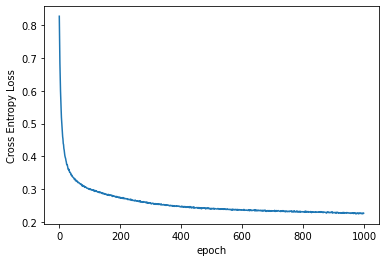

In [25]:
with torch.no_grad():
  plt.plot(range(epochs), losses)
  plt.ylabel('Cross Entropy Loss')
  plt.xlabel('epoch')

In [27]:
with torch.no_grad():
    y_val = model(cat_test, con_test)
    loss = criterion(y_val, y_test)
print(f'CE Loss: {loss:.8f}')

rows = 50
correct = 0
print(f'{"MODEL OUTPUT":26} ARGMAX  Y_TEST')
for i in range(rows):
    print(f'{str(y_val[i]):26} {y_val[i].argmax():^7}{y_test[i]:^7}')
    if y_val[i].argmax().item() == y_test[i]:
        correct += 1
print(f'\n{correct} out of {rows} = {100*correct/rows:.2f}% correct')

CE Loss: 0.23812653
MODEL OUTPUT               ARGMAX  Y_TEST
tensor([ 2.3848, -2.4845])    0      0   
tensor([-1.8972,  2.3584])    1      0   
tensor([ 0.9467, -3.7109])    0      0   
tensor([-0.8574,  0.5796])    1      1   
tensor([ 2.3630, -3.1313])    0      0   
tensor([ 2.3297, -1.3547])    0      0   
tensor([ 1.7953, -1.4791])    0      0   
tensor([-1.2521,  1.5393])    1      1   
tensor([ 1.3132, -1.5895])    0      0   
tensor([-0.9863,  1.1258])    1      1   
tensor([ 2.1259, -1.7959])    0      0   
tensor([ 3.0979, -1.3734])    0      0   
tensor([ 1.4457, -1.6258])    0      0   
tensor([-0.1132,  1.5546])    1      1   
tensor([ 2.1354, -2.6144])    0      0   
tensor([-1.7256,  2.0702])    1      1   
tensor([ 1.3275, -2.3732])    0      1   
tensor([ 2.1330, -2.6248])    0      0   
tensor([ 1.3373, -1.0291])    0      0   
tensor([ 2.1740, -2.4103])    0      0   
tensor([-2.4657,  2.3436])    1      1   
tensor([ 0.4441, -0.4017])    0      1   
tensor([-1.546